In [1]:
import os
import importlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from anndata import AnnData
import dask.array as da
import snapfish2 as sf
from utils.data import DataTree
dtree = DataTree("../data")
importlib.reload(sf)

<module 'snapfish2' from '/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/snapfish2/__init__.py'>

In [2]:
%reload_ext autoreload
%autoreload 2

In [ ]:
loader = sf.pp.FOF_CT_Loader({
    "rep1": dtree["takei_nature_2021", "25Kb", "rep1"],
    "rep2": dtree["takei_nature_2021", "25Kb", "rep2"]
})
adata = loader.create_adata("chr3", {"X": 103, "Y": 103, "Z": 250})
sf.pp.filter_normalize(adata)
sf.pp.axis_weight(adata)

In [15]:
loader = sf.pp.FOF_CT_Loader("../data/su_cell_2020/chromosome2.csv")
adata = loader.create_adata("chr2")
# sf.pp.filter_normalize(adata, "carr")
sf.pp.median_pdist(adata)

In [ ]:
from statsmodels.stats import multitest as multi

In [3]:
keys = ["rep1", "rep2", "rep3"]

data_paths = {c:dtree["takei_science_2021", "25Kb", c] for c in keys}
loader = sf.pp.FOF_CT_Loader(data_paths)
ratio = {"X": 103, "Y": 103, "Z": 250}
adata = loader.create_adata("chr3", ratio, obs_cols_add=["Cell_ID"])

type_paths = {c:dtree["takei_science_2021", "cell_type", c] for c in keys}
dfs = sf.pp.FOF_CT_Loader(type_paths).read_data()

sf.pp.add_cell_type(adata, dfs, "Cell_ID", "cluster label")

In [4]:
celltype_dict = {1:'Pvalb', 2:'Vip', 3:'Ndnf', 4:'Sst', 5:'Astro',
                 6:'Micro', 7:'Endo', 8:'Oligo', 9:'Ex'}
adata.obs["cell_type"] = adata.obs["cluster label"].map(celltype_dict)
adata.obs["cell_type"].value_counts()

cell_type
Ex       2514
Endo      264
Astro     233
Pvalb     207
Micro     130
Oligo     107
Vip        90
Sst        81
Ndnf       50
Name: count, dtype: int64

In [5]:
sf.pp.filter_normalize(adata)
loop = sf.tl.LoopCaller()
loop_df = loop.to_bedpe(loop.call_loops(adata), adata)

In [6]:
adata1 = adata[adata.obs["cell_type"]=="Endo"]
adata2 = adata[adata.obs["cell_type"]=="Ex"]

diffloop = sf.tl.DiffLoop(adata1, adata2)
res = diffloop.diff_loops(loop_df[loop_df["summit"]])
df = diffloop.to_bedpe(res, 0.1)

Found 3 differential loops, while 25 are not differential loops.


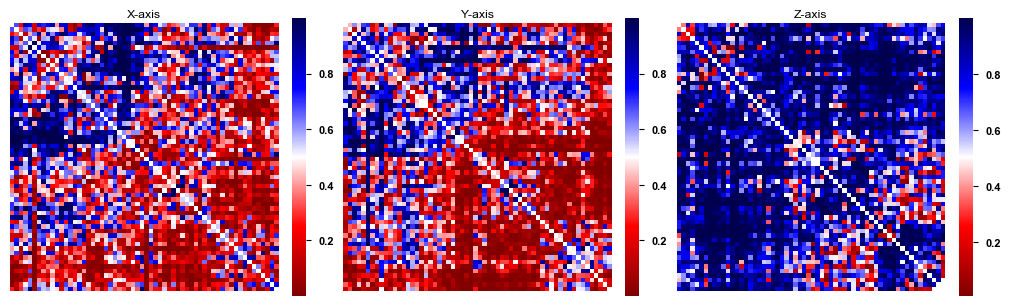

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, c in enumerate(["X", "Y", "Z"]):
    sf.pl.pairwise_heatmap(res["f_pvals"][i], x=f"{c}-axis", ax=axes[i])

In [19]:
adata.var["Chrom_Start"].values

[autoreload of snapfish2.utils.eval failed: Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/opt/miniconda3/lib/python3.12/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/opt/miniconda3/lib/python3.12/importlib/__init__.py", line 131, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 866, in _exec
  File "<frozen importlib._bootstrap_external>", line 995, in exec_module
  File "<frozen importlib._bootstrap>", line 488, in _call_with_frames_removed
  File "/Users/redfishhh/Documents/research/MultiplexedFISH/LoopTests/snapfish2/utils/eval.py", line 192, in <module>
    def axis_weight(adata:AnnData, inplace:bool=True) -> None | np.array:
                                                         ~~~~~^~~~~~~~~~
TypeE

array([7675000, 7700000, 7750000, 7775000, 7800000, 7875000, 7900000,
       7925000, 7950000, 7975000, 8000000, 8025000, 8050000, 8075000,
       8100000, 8125000, 8150000, 8200000, 8225000, 8250000, 8275000,
       8300000, 8350000, 8375000, 8400000, 8450000, 8475000, 8500000,
       8525000, 8550000, 8575000, 8600000, 8625000, 8650000, 8675000,
       8700000, 8725000, 8750000, 8775000, 8800000, 8825000, 8850000,
       8875000, 8900000, 8925000, 8950000, 8975000, 9000000, 9025000,
       9050000, 9075000, 9100000, 9125000, 9150000, 9175000, 9200000,
       9225000, 9250000, 9275000, 9300000])